<a href="https://colab.research.google.com/github/nathaliacastelobranco/CCOMP_linear_algebra/blob/main/BSS_SVD_CCOMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercício de aplicação numérica para carga senoidal - Apostila Dinâmica I PGECIV (Pág. 62)**

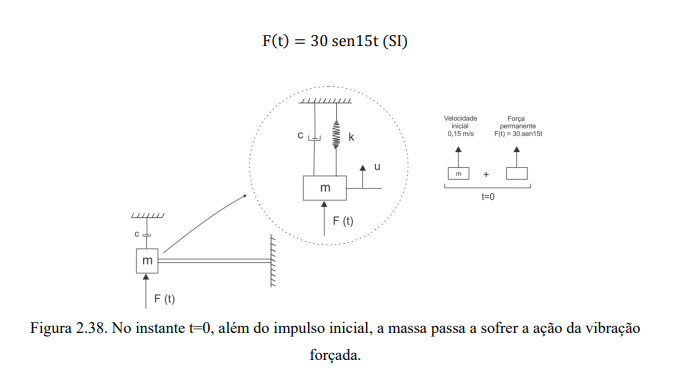

Dados:
- Velocidade inicial: v0 = 0,15 m/s
- Massa: m = 20 kg
- Rigidez da mola: k = 9000 N/m
- Característica do amortecedor: c = 150 N s m^-1
- Aceleração da gravidade: g = 9,8 m/s²



In [ ]:
# importando libs

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# definindo dados iniciais

v0 = 0.15
m = 20
k = 9000
c = 150
g = 9.8

F0 = 30 # newton
w = 15 # excitação 15 rad/s

t = np.linspace(0,2,100)

**Resposta permanente**
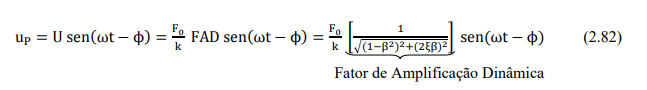

In [ ]:
# obtendo a frequência fundamental 
w0 = np.sqrt(k/m)
print('Frequência fundamental: ', w0, ' rad/s')

Frequência fundamental:  21.213203435596427  rad/s


In [ ]:
# obtendo o coeficiente de amortecimento
csi = c/(2*m*w0)
print('O valor de ξ é ', csi)

O valor de ξ é  0.17677669529663687


In [ ]:
# obtendo a relação entre as frequências (verificando a ressonância)
beta = w/w0
print(beta)

0.7071067811865475


In [ ]:
# ângulo de defasagem
phi = np.arctan((2*csi*beta)/(1-(pow(beta,2))))
print('O ângulo de fase é ', phi, ' rad')

O ângulo de fase é  0.4636476090008059  rad


In [ ]:
# FAD - fator de amplificação dinâmica
fad1 = pow(1-beta*beta,2)
fad2 = pow(2*csi*beta,2)

FAD = 1/(np.sqrt(fad1+fad2))
print(FAD)

1.7888543819998313


In [ ]:
# resposta permanente (Up)

Up = (F0/k)*FAD*np.sin(F0*t+phi)
print((F0/k)*FAD,' sen ', F0, ' t + ', phi )

0.005962847939999438  sen  30  t +  0.4636476090008059


In [ ]:
# resposta transiente (Uh) - devido a vibração livre e velocidade inicial

# frequência amortecida
wa = np.sqrt(1-(csi*csi))*w0 
print(wa)
# resposta transiente

# Uh = np.exp(-(csi*w0*t))*A*np.sin(wa*t+psi)

20.879116360612585


Derivando a solução geral para inserir a velocidade de entrada

In [ ]:
# u(t) = np.exp(-(csi*w0*t))*A*np.sin(wa*t+psi) + (F0/k)*FAD*np.sin(w0*t+phi)
# v(t) = -(csi*w0)*A*np.exp(-(csi*w0*t))*np.sin(wa*t+psi) + np.exp(-(csi*w0*t))*A*wa*np.cos(wa*t+psi) + (F0/k)*FAD*F0*np.cos(F0*t+phi) 

# #  POSIÇÃO INICIAL (t = 0, u = 0, v = 0,15) # #

# u0 = np.exp(-(csi*w0*0))*A*np.sin(wa*0+psi) + (F0/k)*FAD*np.sin(F0*0+phi)
AsinPSI = -(F0/k)*FAD*np.sin(phi)

# 0.15 = -(csi*w0)*A*np.exp(-(csi*w0*0))*np.sin(wa*0+psi) + np.exp(-(csi*w0*0))*A*wa*np.cos(wa*0+psi) + (F0/k)*FAD*F0*np.cos(F0*0+phi) 
# 0.15 = -(csi*w0) * 1 * AsinPSI + 1 * wa * AcosPSI + (F0/k)*FAD*F0*np.cos(F0*0+phi)
# 0.15 = -(csi*w0) * 1 * AsinPSI + 1 * wa * AcosPSI + (F0/k)*FAD*F0*np.cos(F0*0+phi)
AcosPSI = (0.15 + (csi*w0) * AsinPSI - (F0/k)*FAD*F0*np.cos(F0*0+phi))/wa

tanPSI = AsinPSI/AcosPSI

PSI = np.arctan(tanPSI) # 1,22 rad

A = AsinPSI / np.sin(PSI)

print(A)

-0.002833491456688274


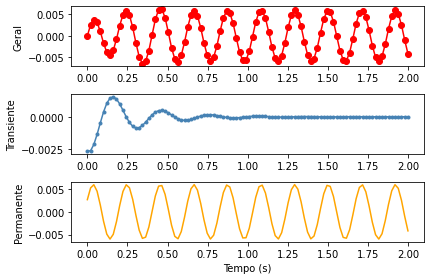

In [ ]:
# U(t) = Uh + Up

Uh = np.exp(-(csi*w0*t))*A*np.sin(wa*t+PSI)
Up

U = Uh + Up

# Plot
# plt.figure()

# models = [U,Uh,Up] # Solução geral, Solução Transiente e Solução Permanente
# names = ['Solução geral','Solução Transiente','Solução Permanente']
# colors = ['red','steelblue','orange']

plt.subplot(3, 1, 1)
plt.plot(t, U, 'o-', color='red')
# plt.title('Respostas dinâmicas')
plt.ylabel('Geral')

plt.subplot(3, 1, 2)
plt.plot(t, Uh, '.-', color='steelblue')
plt.ylabel('Transiente')

plt.subplot(3, 1, 3)
plt.plot(t, Up, '-', color='orange')
plt.xlabel('Tempo (s)')
plt.ylabel('Permanente')

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment


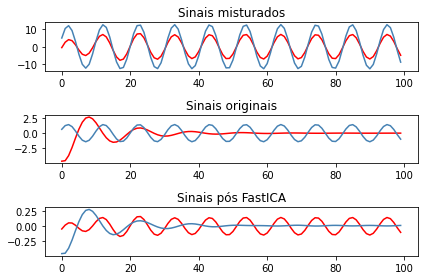

In [ ]:
print(__doc__)

from sklearn.decomposition import FastICA

# importando os dados
n_samples = 100 # amostras
time = t

s1 = Uh  # importar resposta transiente
s2 = Up # importar resposta permanente

S = np.c_[s1,s2] # concatena os sinais

S /= S.std(axis=0)  # normaliza os dados
A = np.array([[0.8, 5], [0.15, 9]]) # matriz de mistura
X = np.dot(S, A.T)


# início do ICA
ica = FastICA(n_components=2,algorithm='parallel',whiten=True) # 2 sinais de entrada
S_ = ica.fit_transform(X) # reconstrói o X do produto interno anterior
A_ = ica.mixing_ # obtenho uma matriz de mistura estimada

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# print(np.allclose(X, np.dot(S_, A_.T) + ica.mean_))

# Plot
plt.figure()

models = [X,S,S_] # misturados, original e separados
names = ['Sinais misturados','Sinais originais','Sinais pós FastICA']
colors = ['red','steelblue','orange']

for ii,(model, name) in enumerate(zip(models, names), 1):
  plt.subplot(3,1,ii)
  plt.title(name)
  for sig, color in zip(model.T, colors):
    plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
W = ica.components_ # matriz que obtém as fontes independentes, matriz de separação
print(W)

[[ 0.05720205 -0.0301747 ]
 [-0.00103853  0.0515473 ]]


In [ ]:
K = ica.whitening_ # matriz antes do processo de branqueamento
print(K)

[[-0.02974492 -0.02738549]
 [-0.04887119  0.05308174]]
